# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd

first_csv = pd.read_csv("states0.csv")

print(first_csv.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get a list of all CSV file names in the current directory
csv_files = glob.glob("*.csv")

# Print the list of file names to check what we found
print(csv_files)

# We need to read each CSV file into a DataFrame first, then concatenate them.

# Create a list to hold each DataFrame
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Now concatenate all DataFrames into one
us_census = pd.concat(dataframes, ignore_index=True)

print(us_census.head())



['states8.csv', 'states9.csv', 'states4.csv', 'states5.csv', 'states7.csv', 'states6.csv', 'states2.csv', 'states3.csv', 'states1.csv', 'states0.csv']
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print("Census dtypes:")
print(us_census.dtypes)
print()
print("Census columns:")
print(us_census.columns)

Census dtypes:
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Census columns:
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
print(us_census.head())


   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
# Remove the dollar sign and commas using regex, then convert to numeric
us_census["Income"] = us_census["Income"].replace('[\$,]', '', regex=True).astype(float)
us_census["Income"] = pd.to_numeric(us_census["Income"])
print("Checking if regex worked:")
print(us_census["Income"].iloc[0])
print("Checking that dtype for 'Income' worked:")
print(us_census["Income"].dtype)


Checking if regex worked:
59125.27
Checking that dtype for 'Income' worked:
float64


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
us_census[["Men", "Women"]] = us_census["GenderPop"].str.split("_", expand=True)
print("Checking new two columns properly separated:")
print(us_census.head())

Checking new two columns properly separated:
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop        Men      Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388M    543273F  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409M   2455167F  
2  1.02%   0.04%  51805.41      423477M_419713F    423477M    419713F  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756M   3331859F  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316M  13367298F  


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
us_census["Men"] = us_census["Men"].str.replace("M", "")
us_census["Women"] = us_census["Women"].str.replace("F", "")

print("Checking that 'M' and 'F' were removed:")
print(us_census.head())

Checking that 'M' and 'F' were removed:
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop       Men     Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409   2455167  
2  1.02%   0.04%  51805.41      423477M_419713F    423477    419713  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756   3331859  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316  13367298  


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

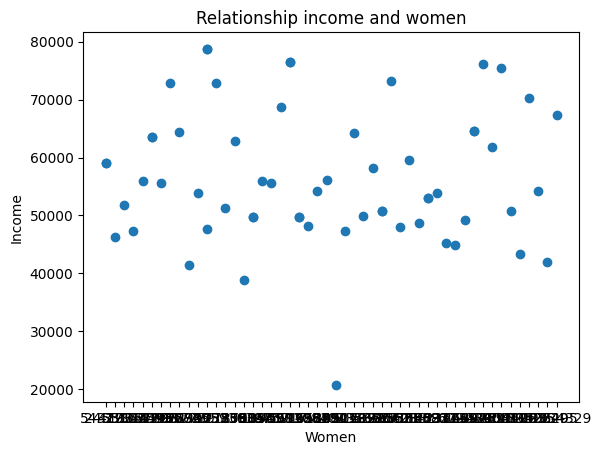

In [8]:
plt.title("Relationship income and women")
plt.xlabel("Women")
plt.ylabel("Income")
plt.scatter(us_census["Women"], us_census["Income"])
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
# Print the number of women per state before filling NaNs
print("Women per state (before filling NaNs):")
print(us_census[["State", "Women"]])

# Count and print the number of NaN values in the 'Women' column
num_nan_women = us_census["Women"].isna().sum()
print(f"Number of NaN values in 'Women' column: {num_nan_women}")

# Fill NaN values in 'Women' column with (TotalPop - Men)
us_census["Women"] = pd.to_numeric(us_census["Women"])
us_census["Men"] = us_census["Men"].astype(float)
us_census["TotalPop"] = us_census["TotalPop"].astype(float)
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])

# Print the number of women per state after filling NaNs
print("Women per state (after filling NaNs):")
print(us_census[["State", "Women"]])

# Double-check that there are no more NaN values
num_nan_women_after = us_census["Women"].isna().sum()
print(f"Number of NaN values in 'Women' column after filling: {num_nan_women_after}")


Women per state (before filling NaNs):
                   State     Women
0           Rhode Island    543273
1         South Carolina   2455167
2           South Dakota    419713
3              Tennessee   3331859
4                  Texas  13367298
5                   Utah   1444150
6                   Utah   1444150
7                Vermont    318031
8               Virginia   4195682
9             Washington   3497739
10         West Virginia    937789
11             Wisconsin   2890732
12              Maryland          
13         Massachusetts   3455936
14              Michigan   5038598
15             Minnesota   2727005
16           Mississippi   1536358
17              Missouri   3081445
18              Missouri   3081445
19               Montana          
20              Nebraska    939759
21                Nevada   1390901
22         New Hampshire    670717
23            New Jersey   4561386
24                  Ohio   5913084
25              Oklahoma   1942789
26              

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [14]:
# Check how many duplicate rows are in the DataFrame
num_duplicates = us_census.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


11. Drop those duplicates using the `.drop_duplicates()` function.

In [15]:
us_census = us_census.drop_duplicates()
print("Checking if drop_duplicates() worked:")

# To check if duplicates remain, we should sum the boolean Series returned by .duplicated().
num_duplicates = us_census.duplicated().sum()
print(f"Number of duplicate rows after drop_duplicates(): {num_duplicates}")

# If num_duplicates is 0, then drop_duplicates() worked!

Checking if drop_duplicates() worked:
Number of duplicate rows after drop_duplicates(): 0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

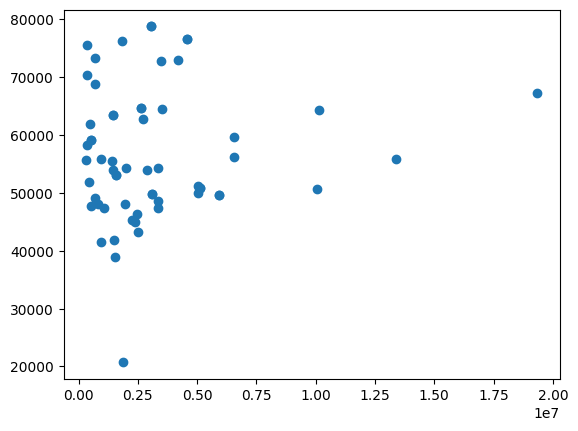

In [16]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [17]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [ ]:
print("Before convertion:")
print(us_census.dtypes)
print()
# Convert race percentage columns to numeric by removing '%' and handling missing values
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for col in race_columns:
    # Remove '%' and convert to float
    us_census[col] = us_census[col].str.replace('%', '').astype(float)
    # Fill NaN values with 0 (or another value if more appropriate)
    us_census[col] = us_census[col].fillna(0)
print(us_census.dtypes)
print()
print(us_census.head())



Before convertion:
Unnamed: 0      int64
State          object
TotalPop      float64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men           float64
Women         float64
dtype: object



AttributeError: Can only use .str accessor with string values!

In [24]:
print(us_census.duplicated().sum())

0


## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

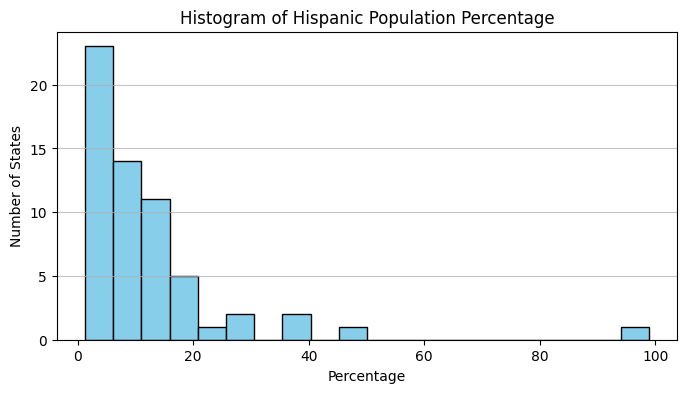

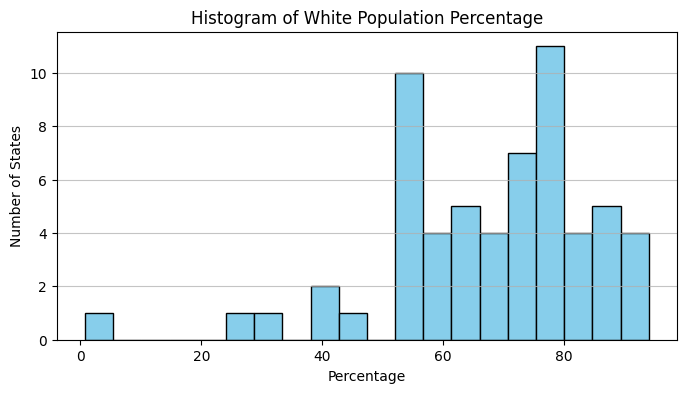

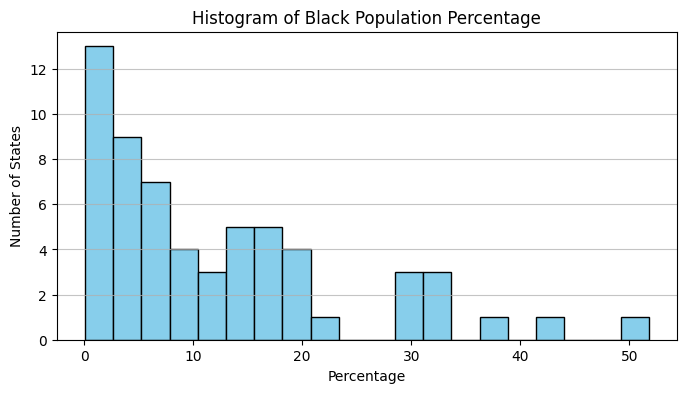

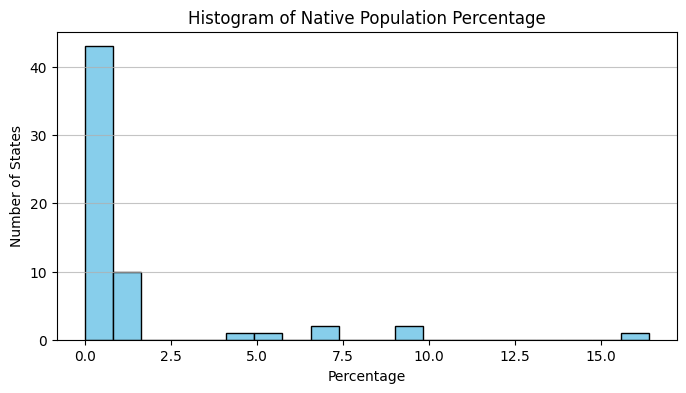

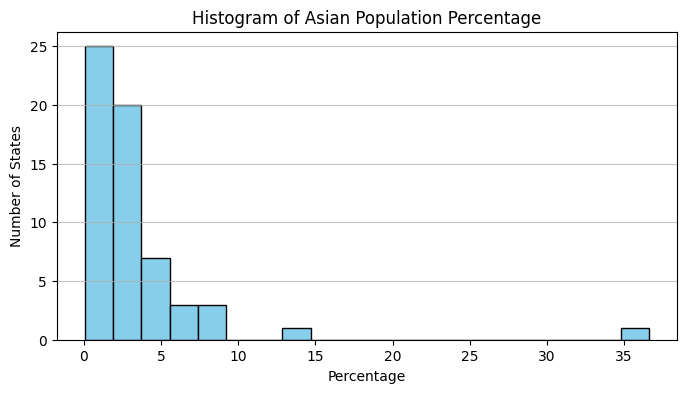

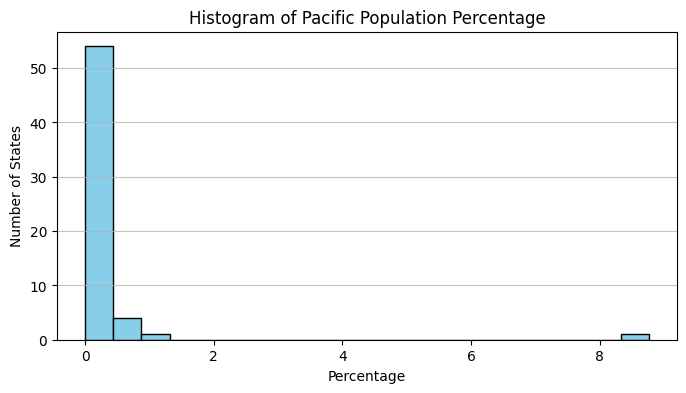

In [25]:
import matplotlib.pyplot as plt

race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for col in race_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(us_census[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} Population Percentage')
    plt.xlabel('Percentage')
    plt.ylabel('Number of States')
    plt.grid(axis='y', alpha=0.75)
    plt.show()